In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('ifood_df.csv')

In [3]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
data.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0
2204,52869.0,1,1,40,84,3,61,2,1,21,...,0,0,0,0,0,0,1,151,130,0


In [5]:
print(f'Dataset have {data.shape[0]} rows and {data.shape[1]} columns')

Dataset have 2205 rows and 39 columns


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
missing_values = data.isnull().sum()
print("Missing values in each column: ")
print(missing_values)

Missing values in each column: 
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntReg

In [8]:
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows: ", duplicate_rows)

Number of duplicate rows:  184


In [9]:
data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [10]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

Data Exploration

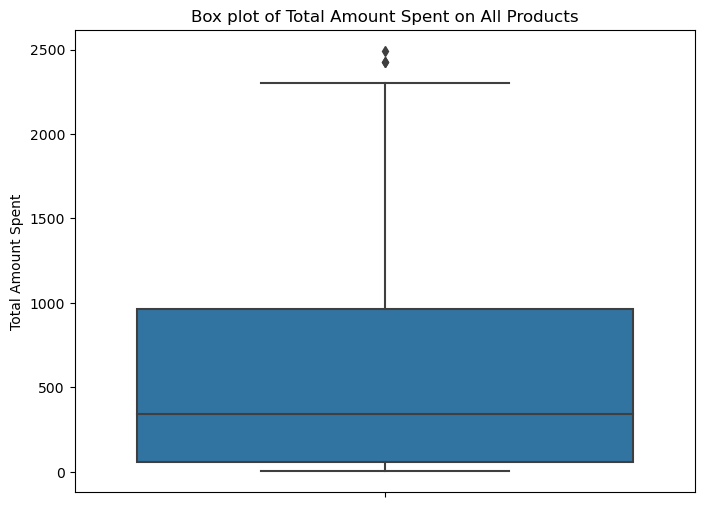

In [11]:
# Box plot for the total amount spent on all products (MntTotal)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='MntTotal')
plt.title('Box plot of Total Amount Spent on All Products')
plt.ylabel('Total Amount Spent')
plt.show()

In [12]:
# Outliers for the total amount spent on all products (MntTotal)
outliers = data[data['MntTotal'] > data['MntTotal'].quantile(0.75) + 1.5 * (data['MntTotal'].quantile(0.75) - data['MntTotal'].quantile(0.25))]
print("Outliers for MntTotal:")
print(outliers[['MntTotal']])

Outliers for MntTotal:
      MntTotal
1159      2429
1467      2491
1547      2429


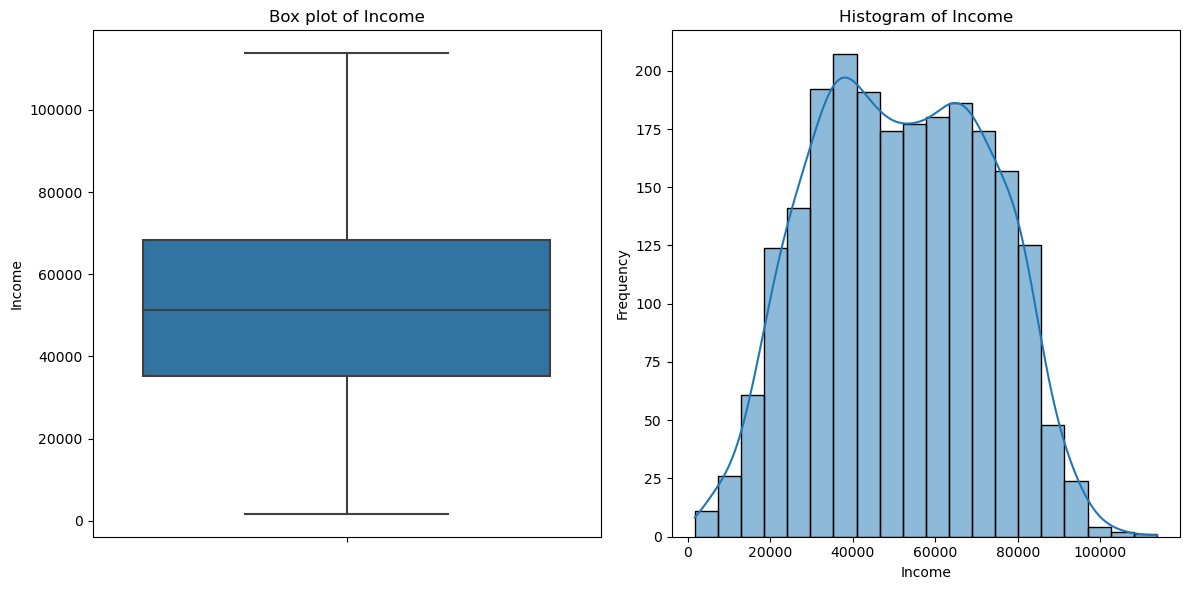

In [13]:
# Box plot and histogram for income
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, y='Income')
plt.title('Box plot of Income')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='Income', bins=20, kde=True)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

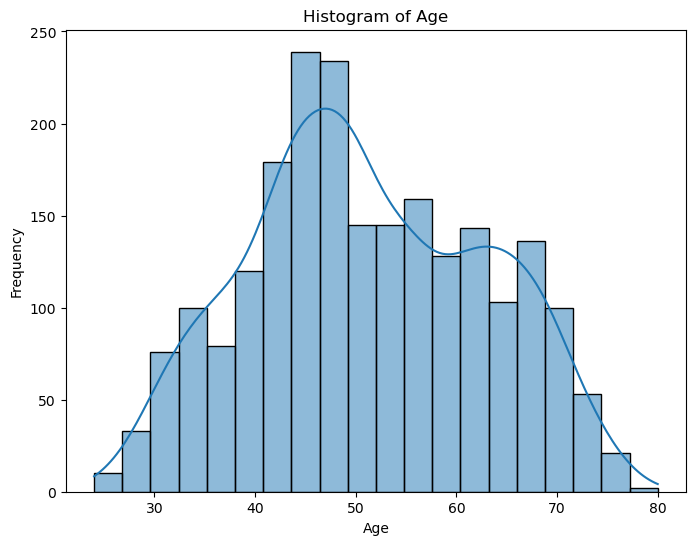

In [14]:
# Histogram for age
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

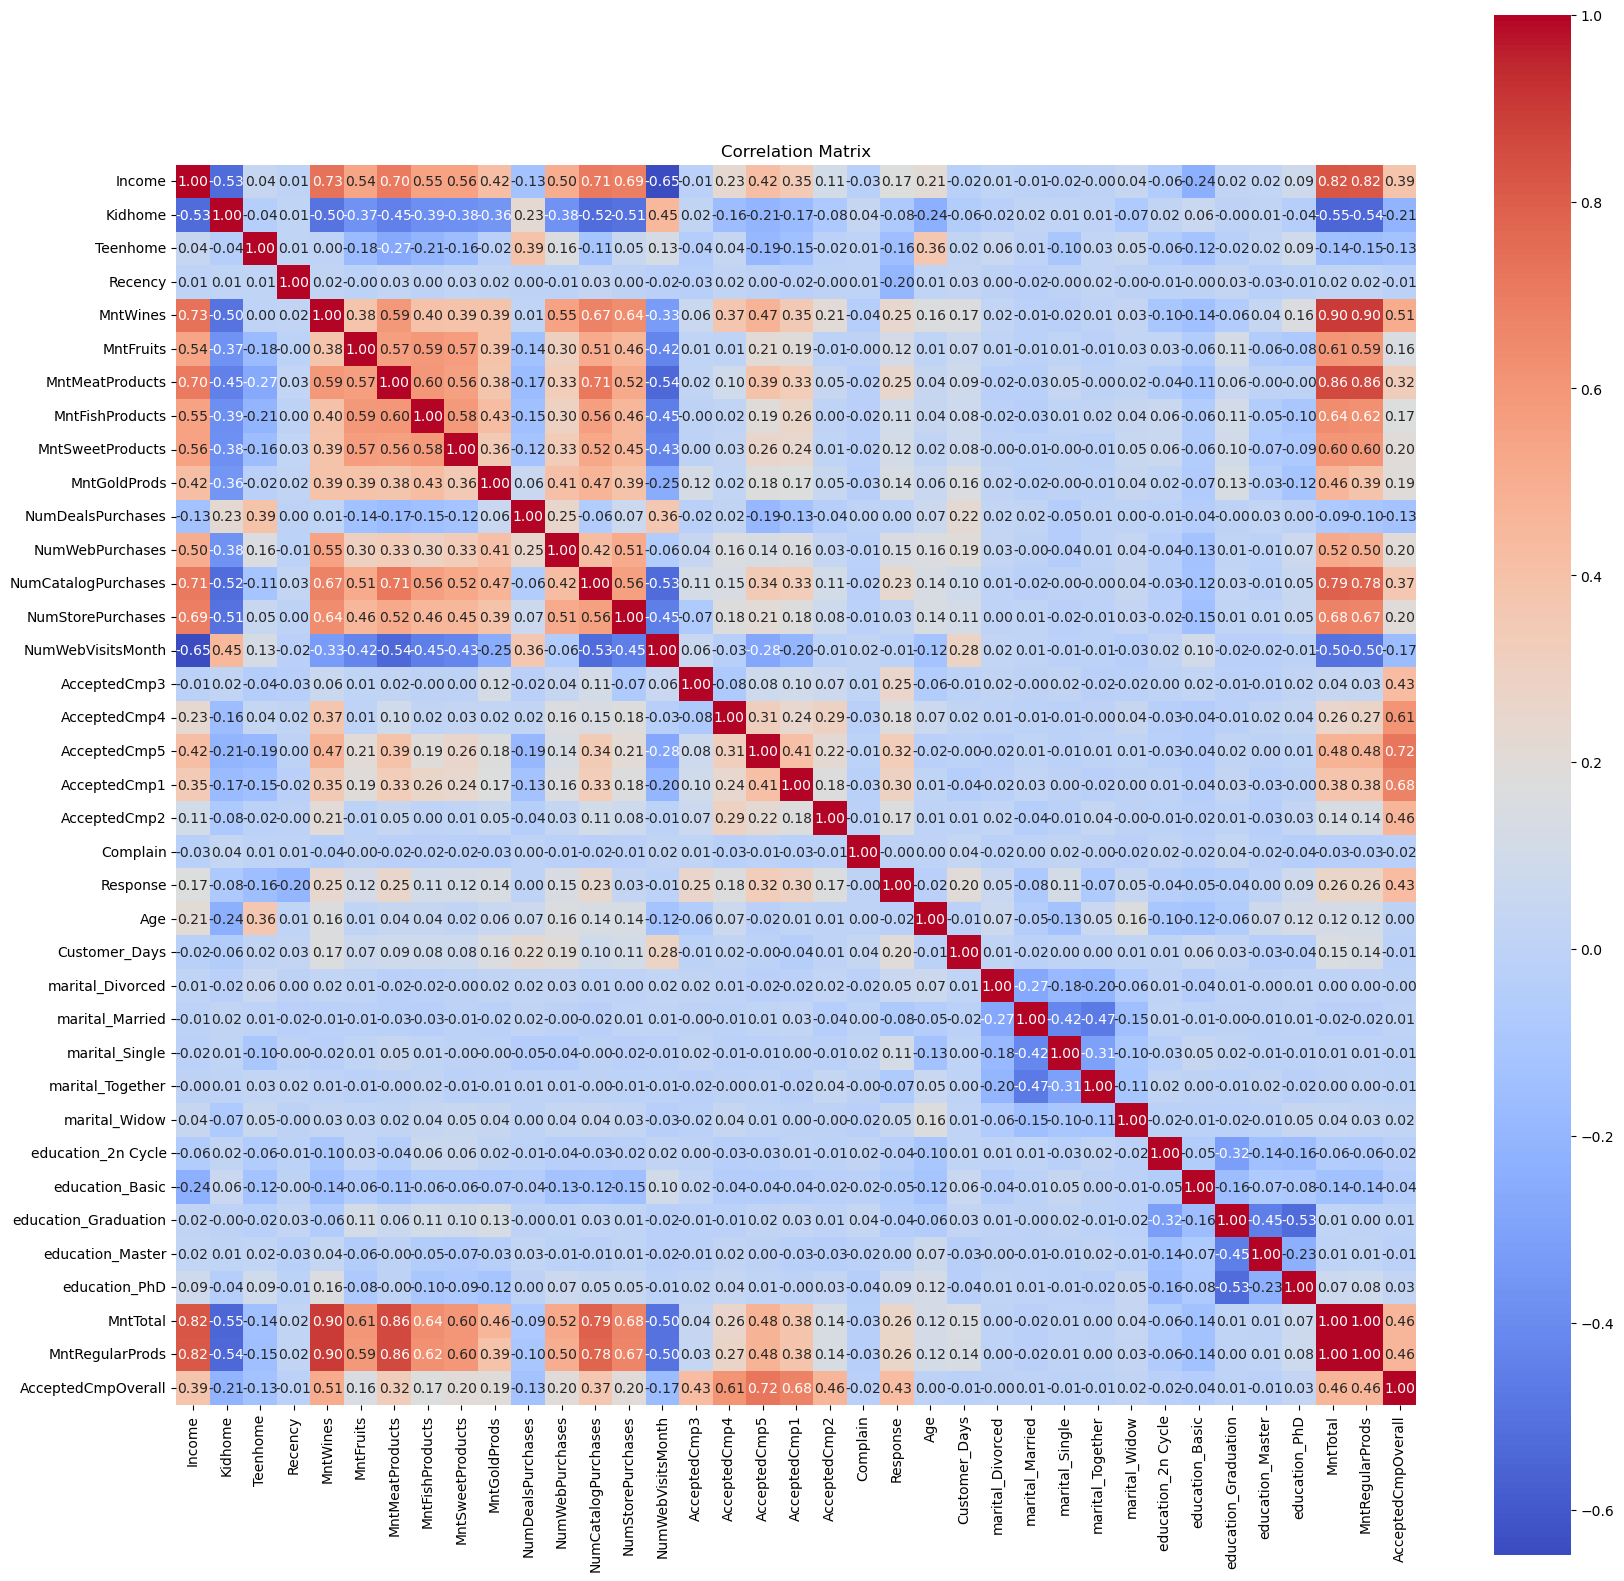

In [15]:
# Correlation matrix
plt.figure(figsize=(20,20))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Point-Biserial correlations for binary variables
binary_variables = ['Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                    'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'marital_Divorced', 
                    'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 
                    'education_2n Cycle', 'education_Basic', 'education_Graduation', 
                    'education_Master', 'education_PhD']
point_biserial_correlations = {}

In [17]:
for var in binary_variables:
    point_biserial_correlation = stats.pointbiserialr(data[var], data['MntTotal'])
    point_biserial_correlations[var] = point_biserial_correlation.correlation

In [18]:
point_biserial_correlations_df = pd.DataFrame.from_dict(point_biserial_correlations, orient='index', columns=['Point-Biserial Correlation'])
print("\nPoint-Biserial Correlations for Binary Variables:")
print(point_biserial_correlations_df)


Point-Biserial Correlations for Binary Variables:
                      Point-Biserial Correlation
Kidhome                                -0.551152
Teenhome                               -0.142995
AcceptedCmp3                            0.044571
AcceptedCmp4                            0.259158
AcceptedCmp5                            0.475559
AcceptedCmp1                            0.384526
AcceptedCmp2                            0.138390
Complain                               -0.032959
marital_Divorced                        0.003726
marital_Married                        -0.022251
marital_Single                          0.005940
marital_Together                        0.001622
marital_Widow                           0.035878
education_2n Cycle                     -0.060272
education_Basic                        -0.138631
education_Graduation                    0.014332
education_Master                        0.006362
education_PhD                           0.070804


Feature Engineering

In [19]:
# Create new feature 'Marital'
data['Marital'] = data[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].idxmax(axis=1)
data['Marital'] = data['Marital'].apply(lambda x: x.split('_')[1])  # Extracting the marital status

# Create new feature 'In_relationship'
data['In_relationship'] = data['Marital'].apply(lambda x: True if x in ['Married', 'Together'] else False)

# Displaying the first few rows of the modified dataset
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,False
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,True
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,True
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,True


K-mean clustering and exploration of clustering

In [20]:
X = data[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
          'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
          'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Age','Customer_Days', 'education_2n Cycle', 
          'education_Basic', 'education_Graduation', 'education_Master','education_PhD', 'MntTotal', 'MntRegularProds']]

In [21]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [23]:

# Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

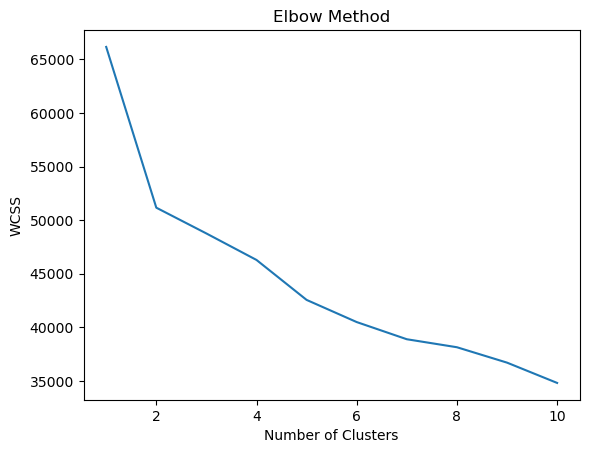

In [24]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [25]:
# Perform K-means clustering with the optimal number of clusters
k = 5  # Adjust based on the elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [26]:
# Silhouette score analysis
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.18094144782618757


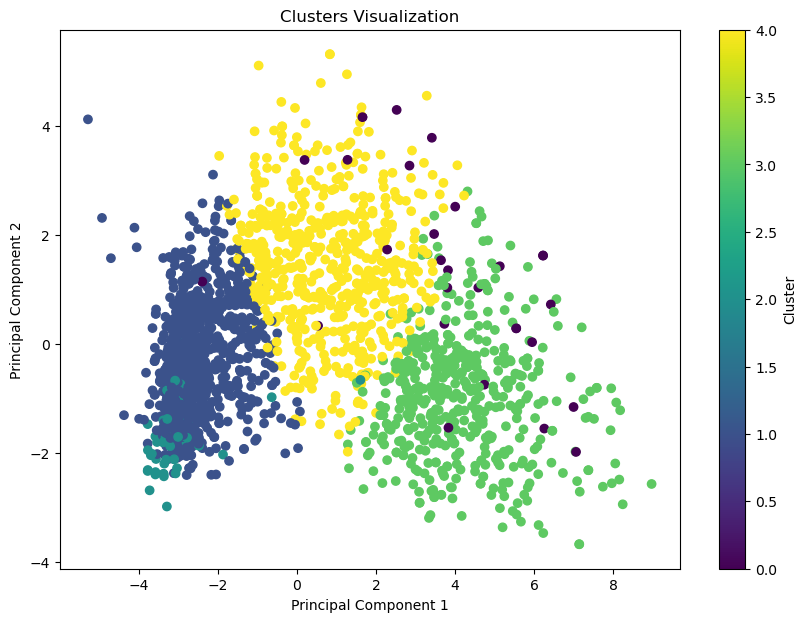

In [27]:
# Visualize the clusters in 2D using the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization')
plt.colorbar(label='Cluster')
plt.show()

<Figure size 1000x700 with 0 Axes>

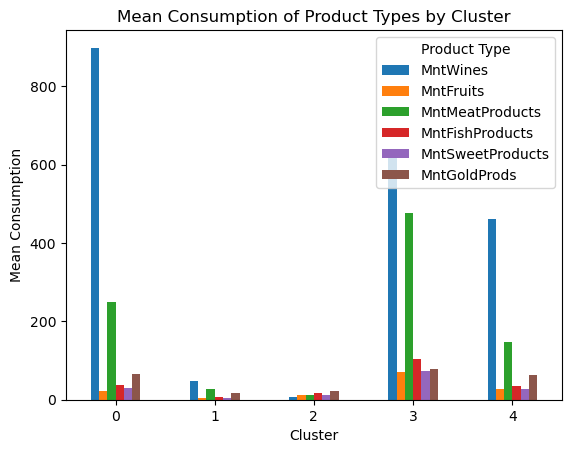

In [28]:
# Mean consumption of different product types by cluster

numeric_data = data.drop(columns=['Marital'])

cluster_means = numeric_data.groupby(clusters).mean()
plt.figure(figsize=(10, 7))
cluster_means[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].plot(kind='bar')
plt.title('Mean Consumption of Product Types by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Consumption')
plt.xticks(rotation=0)
plt.legend(title='Product Type')
plt.show()

In [29]:
# Cluster sizes
cluster_sizes = data.groupby(clusters).size()
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
0      30
1    1009
2      54
3     503
4     609
dtype: int64


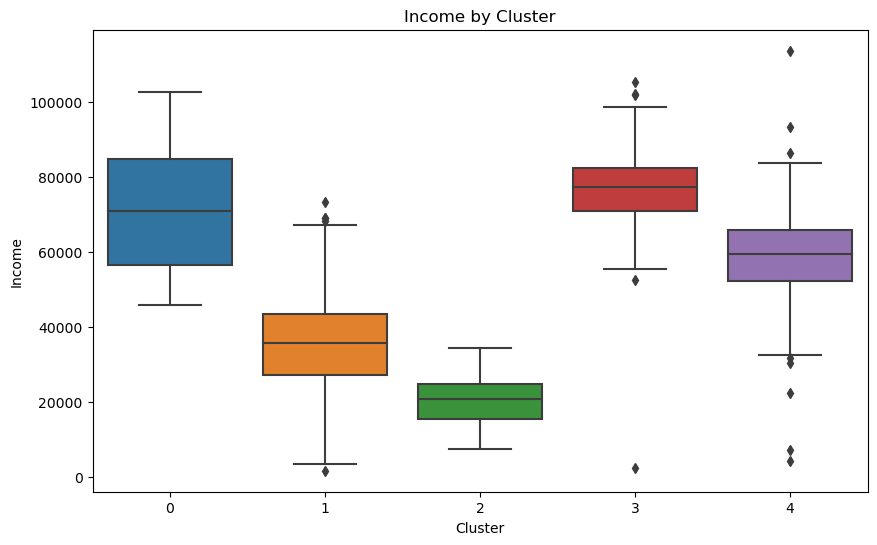

In [30]:
# Income by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x=clusters, y='Income')
plt.title('Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

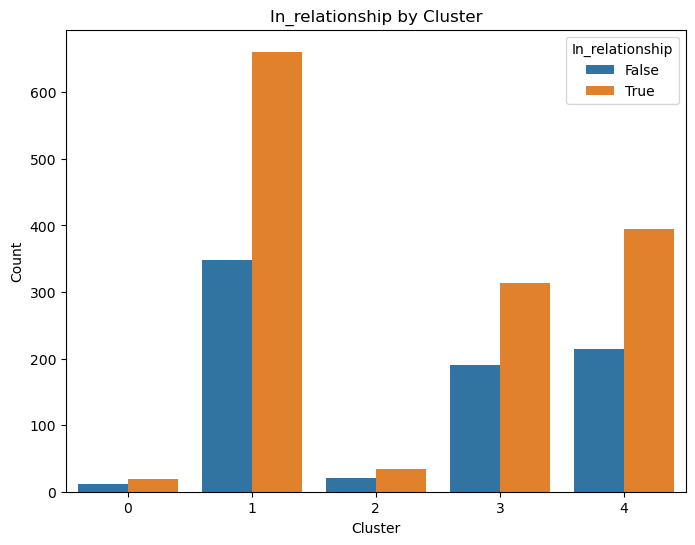

In [31]:
# In_relationship feature by cluster
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=clusters, hue='In_relationship')
plt.title('In_relationship by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='In_relationship')
plt.show()